Upload Data

In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Define file paths
train_file_path = '/content/drive/MyDrive/KDDTrain+.txt'
test_file_path = '/content/drive/MyDrive/KDDTest+.txt'

# Load CSV files into pandas DataFrames
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Display the first few rows of each DataFrame to confirm successful loading
print("Train DataFrame:")
print(train_df.head())

print("\nTest DataFrame:")
print(test_df.head())

Train DataFrame:
   0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5  ...  0.17  0.03  \
0  0  udp    other   SF  146     0    0    0    0    0  ...  0.00  0.60   
1  0  tcp  private   S0    0     0    0    0    0    0  ...  0.10  0.05   
2  0  tcp     http   SF  232  8153    0    0    0    0  ...  1.00  0.00   
3  0  tcp     http   SF  199   420    0    0    0    0  ...  1.00  0.00   
4  0  tcp  private  REJ    0     0    0    0    0    0  ...  0.07  0.07   

   0.17.1  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0    0.88    0.00    0.00    0.00   0.0    0.00   normal  15  
1    0.00    0.00    1.00    1.00   0.0    0.00  neptune  19  
2    0.03    0.04    0.03    0.01   0.0    0.01   normal  21  
3    0.00    0.00    0.00    0.00   0.0    0.00   normal  21  
4    0.00    0.00    0.00    0.00   1.0    1.00  neptune  21  

[5 rows x 43 columns]

Test DataFrame:
   0   tcp   private   REJ    0.1    0.2  0.3  0.4  0.5  0.6  ...  0.04.1  \
0  0   tcp   private   REJ      0    

Data cleaning

In [3]:
# 1. Handling Missing Values
# Let's check for missing values in both train and test datasets
print("Missing values in train data:\n", train_df.isnull().sum())
print("\nMissing values in test data:\n", test_df.isnull().sum())

# Handling missing values for numeric columns
numeric_columns = train_df.select_dtypes(include=['number']).columns
numeric2_columns = test_df.select_dtypes(include=['number']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].median())
test_df[numeric2_columns] = test_df[numeric2_columns].fillna(test_df[numeric2_columns].median())

# Handling missing values for non-numeric columns
non_numeric_columns = train_df.select_dtypes(exclude=['number']).columns
non_numeric2_columns = test_df.select_dtypes(exclude=['number']).columns
train_df[non_numeric_columns] = train_df[non_numeric_columns].fillna(train_df[non_numeric_columns].mode().iloc[0])
test_df[non_numeric2_columns] = test_df[non_numeric2_columns].fillna(test_df[non_numeric2_columns].mode().iloc[0])

# 2. Removing Duplicates
# Check for and remove duplicate rows
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

# Display the shape of the cleaned train and test datasets
print("Shape of cleaned train data:", train_df.shape)
print("Shape of cleaned test data:", test_df.shape)

Missing values in train data:
 0           0
tcp         0
ftp_data    0
SF          0
491         0
0.1         0
0.2         0
0.3         0
0.4         0
0.5         0
0.6         0
0.7         0
0.8         0
0.9         0
0.10        0
0.11        0
0.12        0
0.13        0
0.14        0
0.15        0
0.16        0
0.18        0
2           0
2.1         0
0.00        0
0.00.1      0
0.00.2      0
0.00.3      0
1.00        0
0.00.4      0
0.00.5      0
150         0
25          0
0.17        0
0.03        0
0.17.1      0
0.00.6      0
0.00.7      0
0.00.8      0
0.05        0
0.00.9      0
normal      0
20          0
dtype: int64

Missing values in test data:
 0          0
tcp        0
private    0
REJ        0
0.1        0
0.2        0
0.3        0
0.4        0
0.5        0
0.6        0
0.7        0
0.8        0
0.9        0
0.10       0
0.11       0
0.12       0
0.13       0
0.14       0
0.15       0
0.16       0
0.17       0
0.18       0
229        0
10         0
0.00       

Feature Engineering

In [4]:
from sklearn.preprocessing import StandardScaler

# Extract numerical columns for training data
numerical_columns_train = train_df.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler for training data
scaler_train = StandardScaler()

# Fit scaler on training data and transform training data for numerical columns only
train_df[numerical_columns_train] = scaler_train.fit_transform(train_df[numerical_columns_train])

# Display the first few rows of the transformed training DataFrame
print("Train DataFrame after feature scaling:")
print(train_df.head())

Train DataFrame after feature scaling:
         0  tcp ftp_data   SF       491       0.1       0.2       0.3  \
0 -0.11025  udp    other   SF -0.007737 -0.004919 -0.014089 -0.089487   
1 -0.11025  tcp  private   S0 -0.007762 -0.004919 -0.014089 -0.089487   
2 -0.11025  tcp     http   SF -0.007723 -0.002891 -0.014089 -0.089487   
3 -0.11025  tcp     http   SF -0.007728 -0.004814 -0.014089 -0.089487   
4 -0.11025  tcp  private  REJ -0.007762 -0.004919 -0.014089 -0.089487   

        0.4       0.5  ...      0.17      0.03    0.17.1    0.00.6    0.00.7  \
0 -0.007736 -0.095076  ... -1.161035  2.736839  2.367729 -0.289105 -0.639535   
1 -0.007736 -0.095076  ... -0.938292 -0.174419 -0.480194 -0.289105  1.608750   
2 -0.007736 -0.095076  ...  1.066393 -0.439079 -0.383106  0.066249 -0.572087   
3 -0.007736 -0.095076  ...  1.066393 -0.439079 -0.480194 -0.289105 -0.639535   
4 -0.007736 -0.095076  ... -1.005115 -0.068555 -0.480194 -0.289105 -0.639535   

     0.00.8      0.05    0.00.9   normal 

In [5]:
# Extract numerical columns for test data
numerical_columns_test = test_df.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler for test data
scaler_test = StandardScaler()

# Fit scaler on test data and transform test data for numerical columns only
test_df[numerical_columns_test] = scaler_test.fit_transform(test_df[numerical_columns_test])

# Display the first few rows of the transformed test DataFrame
print("\nTest DataFrame after feature scaling:")
print(test_df.head())


Test DataFrame after feature scaling:
          0   tcp   private   REJ       0.1       0.2       0.3       0.4  \
0 -0.155538   tcp   private   REJ -0.021989 -0.096898 -0.017624 -0.059105   
1 -0.154116   tcp  ftp_data    SF  0.005472 -0.096898 -0.017624 -0.059105   
2 -0.155538  icmp     eco_i    SF -0.021946 -0.096898 -0.017624 -0.059105   
3 -0.154827   tcp    telnet  RSTO -0.021989 -0.096191 -0.017624 -0.059105   
4 -0.155538   tcp      http    SF -0.021424  0.587149 -0.017624 -0.059105   

       0.5       0.6  ...    0.04.1    0.06.1    0.00.3    0.00.4    0.00.5  \
0 -0.01946 -0.113524  ... -1.397261 -0.138373 -0.431868 -0.229986 -0.358127   
1 -0.01946 -0.113524  ...  0.002876 -0.228987  1.559859  0.004223 -0.358127   
2 -0.01946 -0.113524  ...  0.898046 -0.410214  2.833257  3.048941 -0.358127   
3 -0.01946 -0.113524  ... -0.685716  0.360004 -0.333914  0.004223 -0.358127   
4 -0.01946 -0.113524  ...  0.898046 -0.410214 -0.399216  0.121328 -0.321515   

     0.00.6    1.00.2  

# Create Column headers
Align test and train column headers to be the same, for easy training

In [6]:
import pandas as pd

# Print the current columns
print("Columns in train_df:", train_df.columns.tolist())
print("Columns in test_df:", test_df.columns.tolist())

# Define new column headers
new_headers_train = ['feature' + str(i) for i in range(1, len(train_df.columns) + 1)]
new_headers_test = ['feature' + str(i) for i in range(1, len(test_df.columns) + 1)]

# Assign new headers to both DataFrames
train_df.columns = new_headers_train
test_df.columns = new_headers_test

# Display the DataFrames to verify the change
print("Train DataFrame with New Headers:\n", train_df.head())
print("\nTest DataFrame with New Headers:\n", test_df.head())

Columns in train_df: ['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.18', '2', '2.1', '0.00', '0.00.1', '0.00.2', '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17', '0.03', '0.17.1', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal', '20']
Columns in test_df: ['0', 'tcp', 'private', 'REJ', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '229', '10', '0.00', '0.00.1', '1.00', '1.00.1', '0.04', '0.06', '0.00.2', '255', '10.1', '0.04.1', '0.06.1', '0.00.3', '0.00.4', '0.00.5', '0.00.6', '1.00.2', '1.00.3', 'neptune', '21']
Train DataFrame with New Headers:
    feature1 feature2 feature3 feature4  feature5  feature6  feature7  \
0  -0.11025      udp    other       SF -0.007737 -0.004919 -0.014089   
1  -0.11025      tcp  private       S0 -0.007762 -0.004919 -0.014089   
2  -0.110

**Select Target variable**

In [7]:
# Extract the target variable column from train_df as training labels
train_labels = train_df['feature42']

# List of variables to keep as they are
keep_variables = ['normal', 'neptune', 'smurf', 'ipsweep']

# Convert values not in the keep_variables list to 'others'
train_labels = train_labels.apply(lambda x: x if x in keep_variables else 'others')

# Display the shape of train_labels and the unique values
print("Shape of train_labels:", train_labels.shape)
print("Unique values in train_labels:", train_labels.unique())

Shape of train_labels: (125972,)
Unique values in train_labels: ['normal' 'neptune' 'others' 'ipsweep' 'smurf']


In [8]:
# Extract the target variable column from test_df as test labels
test_labels = test_df['feature42']

# List of variables to keep as they are
keep_variables = ['normal', 'neptune', 'smurf', 'ipsweep']

# Convert values not in the keep_variables list to 'others'
test_labels = test_labels.apply(lambda x: x if x in keep_variables else 'others')

# Display the shape of test_labels and the unique values
print("Shape of test_labels:", test_labels.shape)
print("Unique values in test_labels:", test_labels.unique())

Shape of test_labels: (22543,)
Unique values in test_labels: ['neptune' 'normal' 'others' 'smurf' 'ipsweep']


# **Apply LSTM**

In [9]:
!pip install tensorflow
!pip install keras

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical

# Preprocessing pipeline for numerical and categorical features
numerical_features = train_df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = train_df.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the train and test data
train_df_processed = preprocessor.fit_transform(train_df).toarray()
test_df_processed = preprocessor.transform(test_df).toarray()

# Combine train and test labels to fit the label encoder
all_labels = pd.concat([train_labels, test_labels], axis=0)

# Encode the labels as integers
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)
train_labels_encoded_int = label_encoder.transform(train_labels)
test_labels_encoded_int = label_encoder.transform(test_labels)

# Convert labels to categorical format
train_labels_encoded = to_categorical(train_labels_encoded_int)
test_labels_encoded = to_categorical(test_labels_encoded_int)

# Reshape data for LSTM: [samples, time steps, features]
# Assuming we want each sample to be a single time step
train_df_processed = train_df_processed.reshape((train_df_processed.shape[0], 1, train_df_processed.shape[1]))
test_df_processed = test_df_processed.reshape((test_df_processed.shape[0], 1, test_df_processed.shape[1]))

# Build the LSTM model
model1 = Sequential()
model1.add(LSTM(50, activation='relu', input_shape=(1, train_df_processed.shape[2])))
model1.add(Dropout(0.2))
model1.add(Dense(train_labels_encoded.shape[1], activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model1.fit(train_df_processed, train_labels_encoded, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Make predictions
test_predictions1 = model1.predict(test_df_processed)
test_predictions1_labels = np.argmax(test_predictions1, axis=1)

# Decode the integer predictions back to original labels
test_predictions1_labels_decoded = label_encoder.inverse_transform(test_predictions1_labels)

# Evaluate performance
print("Classification Report:")
print(classification_report(test_labels, test_predictions1_labels_decoded))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3150/3150 - 16s - 5ms/step - accuracy: 0.9924 - loss: 0.0432 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 2/10
3150/3150 - 8s - 3ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 3/10
3150/3150 - 11s - 3ms/step - accuracy: 0.9998 - loss: 9.1479e-04 - val_accuracy: 0.9999 - val_loss: 5.0588e-04
Epoch 4/10
3150/3150 - 7s - 2ms/step - accuracy: 0.9999 - loss: 4.3136e-04 - val_accuracy: 1.0000 - val_loss: 3.9722e-04
Epoch 5/10
3150/3150 - 10s - 3ms/step - accuracy: 0.9999 - loss: 2.5944e-04 - val_accuracy: 0.9998 - val_loss: 5.1937e-04
Epoch 6/10
3150/3150 - 7s - 2ms/step - accuracy: 0.9999 - loss: 2.7287e-04 - val_accuracy: 0.9999 - val_loss: 1.6851e-04
Epoch 7/10
3150/3150 - 9s - 3ms/step - accuracy: 0.9999 - loss: 4.2255e-04 - val_accuracy: 0.9999 - val_loss: 1.4285e-04
Epoch 8/10
3150/3150 - 7s - 2ms/step - accuracy: 0.9999 - loss: 1.8328e-04 - val_accuracy: 0.9999 - val_loss: 1.9638e-04
Epoch 9/10
3150/3150 - 8s - 3ms/step - accura

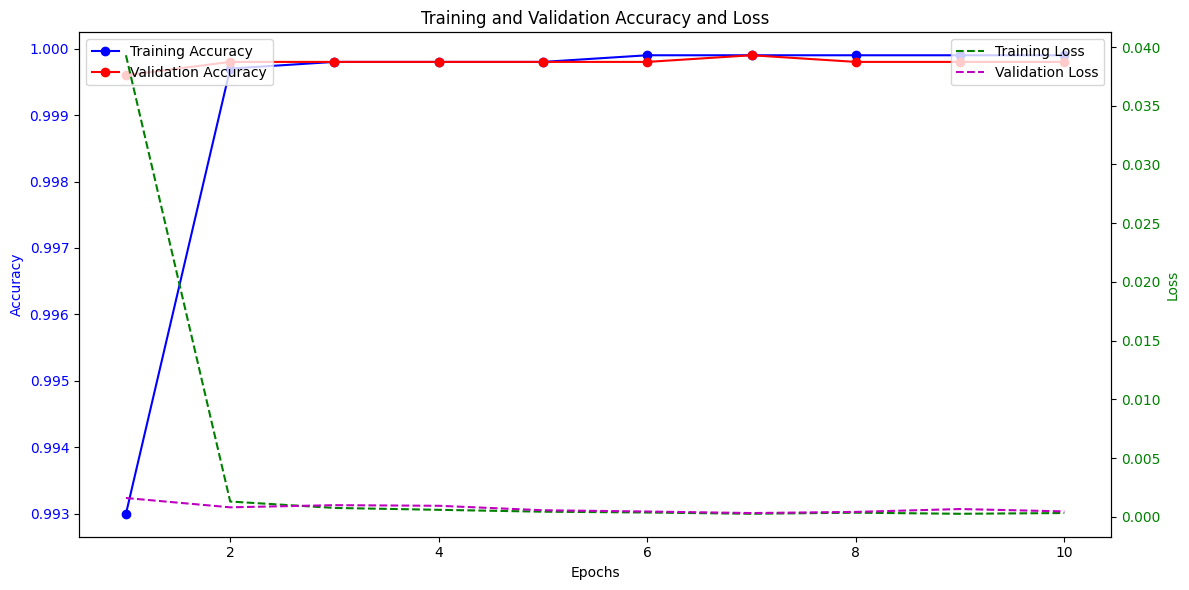

In [11]:
import matplotlib.pyplot as plt

# Example history dictionary (replace with your actual history object)
history = {
    'accuracy': [0.9930, 0.9997, 0.9998, 0.9998, 0.9998, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999],
    'loss': [0.0393, 0.0013, 7.5401e-04, 5.9395e-04, 4.3474e-04, 3.6564e-04, 2.5686e-04, 3.5016e-04, 2.5544e-04, 3.2025e-04],
    'val_accuracy': [0.9996, 0.9998, 0.9998, 0.9998, 0.9998, 0.9998, 0.9999, 0.9998, 0.9998, 0.9998],
    'val_loss': [0.0016, 8.0745e-04, 9.9103e-04, 9.3726e-04, 5.5802e-04, 4.5065e-04, 3.1912e-04, 4.1670e-04, 6.6061e-04, 4.5992e-04]
}

epochs = range(1, len(history['accuracy']) + 1)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot training & validation accuracy values
ax1.plot(epochs, history['accuracy'], 'bo-', label='Training Accuracy')
ax1.plot(epochs, history['val_accuracy'], 'ro-', label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create a second y-axis to plot loss values
ax2 = ax1.twinx()
ax2.plot(epochs, history['loss'], 'g--', label='Training Loss')
ax2.plot(epochs, history['val_loss'], 'm--', label='Validation Loss')
ax2.set_ylabel('Loss', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

plt.title('Training and Validation Accuracy and Loss')
plt.tight_layout()
plt.show()

# **Train GRU**

In [12]:
from keras.layers import GRU

# Build the RNN model
model2 = Sequential()
model2.add(GRU(50, activation='relu', input_shape=(1, train_df_processed.shape[2])))
model2.add(Dropout(0.2))
model2.add(Dense(train_labels_encoded.shape[1], activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(train_df_processed, train_labels_encoded, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Make predictions
test_predictions2 = model2.predict(test_df_processed)
test_predictions2_labels = np.argmax(test_predictions2, axis=1)

# Decode the integer predictions back to original labels
test_predictions2_labels_decoded = label_encoder.inverse_transform(test_predictions2_labels)

# Evaluate performance
print("Classification Report:")
print(classification_report(test_labels, test_predictions2_labels_decoded))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3150/3150 - 11s - 4ms/step - accuracy: 0.9918 - loss: 0.0372 - val_accuracy: 0.9998 - val_loss: 0.0010
Epoch 2/10
3150/3150 - 7s - 2ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 2.1824e-04
Epoch 3/10
3150/3150 - 9s - 3ms/step - accuracy: 0.9998 - loss: 9.5533e-04 - val_accuracy: 0.9999 - val_loss: 2.0993e-04
Epoch 4/10
3150/3150 - 8s - 3ms/step - accuracy: 0.9999 - loss: 4.5400e-04 - val_accuracy: 0.9999 - val_loss: 2.5744e-04
Epoch 5/10
3150/3150 - 11s - 3ms/step - accuracy: 1.0000 - loss: 2.3467e-04 - val_accuracy: 0.9998 - val_loss: 0.0010
Epoch 6/10
3150/3150 - 9s - 3ms/step - accuracy: 1.0000 - loss: 3.3138e-04 - val_accuracy: 1.0000 - val_loss: 1.0229e-04
Epoch 7/10
3150/3150 - 7s - 2ms/step - accuracy: 1.0000 - loss: 2.3098e-04 - val_accuracy: 1.0000 - val_loss: 4.7522e-05
Epoch 8/10
3150/3150 - 10s - 3ms/step - accuracy: 1.0000 - loss: 3.0854e-04 - val_accuracy: 1.0000 - val_loss: 3.9591e-05
Epoch 9/10
3150/3150 - 15s - 5ms/step - accur

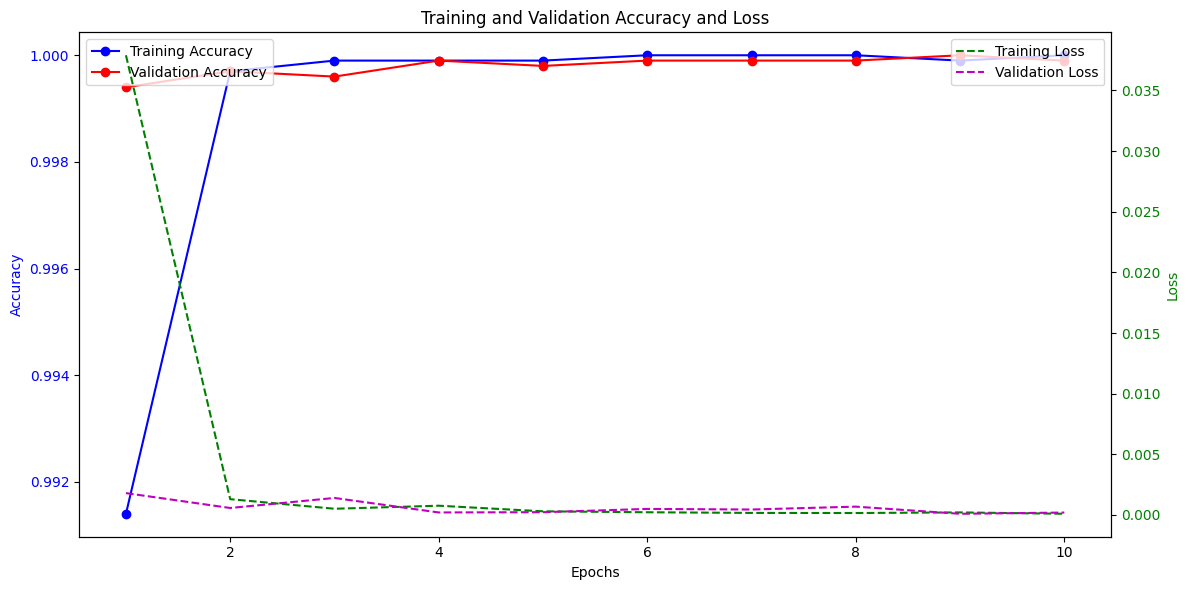

In [13]:
import matplotlib.pyplot as plt

# Provided data
epochs = range(1, 11)
accuracy = [0.9914, 0.9997, 0.9999, 0.9999, 0.9999, 1.0000, 1.0000, 1.0000, 0.9999, 1.0000]
loss = [0.0379, 0.0013, 5.1133e-04, 7.6120e-04, 2.9849e-04, 2.2176e-04, 1.6798e-04, 1.5814e-04, 2.0926e-04, 9.7008e-05]
val_accuracy = [0.9994, 0.9997, 0.9996, 0.9999, 0.9998, 0.9999, 0.9999, 0.9999, 1.0000, 0.9999]
val_loss = [0.0018, 5.7437e-04, 0.0014, 2.0504e-04, 2.2669e-04, 4.9681e-04, 4.4801e-04, 6.8420e-04, 9.4765e-05, 1.9732e-04]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot training & validation accuracy values
ax1.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
ax1.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create a second y-axis to plot loss values
ax2 = ax1.twinx()
ax2.plot(epochs, loss, 'g--', label='Training Loss')
ax2.plot(epochs, val_loss, 'm--', label='Validation Loss')
ax2.set_ylabel('Loss', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

plt.title('Training and Validation Accuracy and Loss')
plt.tight_layout()
plt.show()

# **Train CNN**

In [14]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Preprocessing pipeline for numerical and categorical features
numerical_features = train_df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = train_df.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the train and test data
train_df_processed = preprocessor.fit_transform(train_df).toarray()
test_df_processed = preprocessor.transform(test_df).toarray()

# Combine train and test labels to fit the label encoder
all_labels = pd.concat([train_labels, test_labels], axis=0)

# Encode the labels as integers
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)
train_labels_encoded_int = label_encoder.transform(train_labels)
test_labels_encoded_int = label_encoder.transform(test_labels)

# Convert labels to categorical format
train_labels_encoded = to_categorical(train_labels_encoded_int)
test_labels_encoded = to_categorical(test_labels_encoded_int)

# Reshape data for CNN: [samples, time steps, features]
# Here, we will treat each feature as a spatially arranged 'time step'
train_df_processed = train_df_processed.reshape((train_df_processed.shape[0], train_df_processed.shape[1], 1))
test_df_processed = test_df_processed.reshape((test_df_processed.shape[0], test_df_processed.shape[1], 1))

# Verify shape
print(f"train_df_processed shape: {train_df_processed.shape}")
print(f"test_df_processed shape: {test_df_processed.shape}")

# Build the CNN model
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(train_df_processed.shape[1], 1)))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(train_labels_encoded.shape[1], activation='softmax'))

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model3.fit(train_df_processed, train_labels_encoded, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Make predictions
test_predictions3 = model3.predict(test_df_processed)
test_predictions3_labels = np.argmax(test_predictions3, axis=1)

# Decode the integer predictions back to original labels
test_predictions3_labels_decoded = label_encoder.inverse_transform(test_predictions3_labels)

# Evaluate performance
print("Classification Report:")
print(classification_report(test_labels, test_predictions3_labels_decoded))

train_df_processed shape: (125972, 146, 1)
test_df_processed shape: (22543, 146, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3150/3150 - 35s - 11ms/step - accuracy: 0.9979 - loss: 0.0146 - val_accuracy: 0.9998 - val_loss: 0.0010
Epoch 2/10
3150/3150 - 34s - 11ms/step - accuracy: 0.9997 - loss: 0.0041 - val_accuracy: 0.9997 - val_loss: 4.1847e-04
Epoch 3/10
3150/3150 - 32s - 10ms/step - accuracy: 0.9998 - loss: 6.9281e-04 - val_accuracy: 1.0000 - val_loss: 4.8494e-05
Epoch 4/10
3150/3150 - 41s - 13ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.9999 - val_loss: 0.0010
Epoch 5/10
3150/3150 - 33s - 11ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 6/10
3150/3150 - 32s - 10ms/step - accuracy: 0.9999 - loss: 3.2554e-04 - val_accuracy: 0.9999 - val_loss: 0.0019
Epoch 7/10
3150/3150 - 32s - 10ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 6.7863e-06
Epoch 8/10
3150/3150 - 33s - 11ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 3.1474e-04
Epoch 9/10
3150/3150 - 39s - 12ms/step - accuracy: 1.000

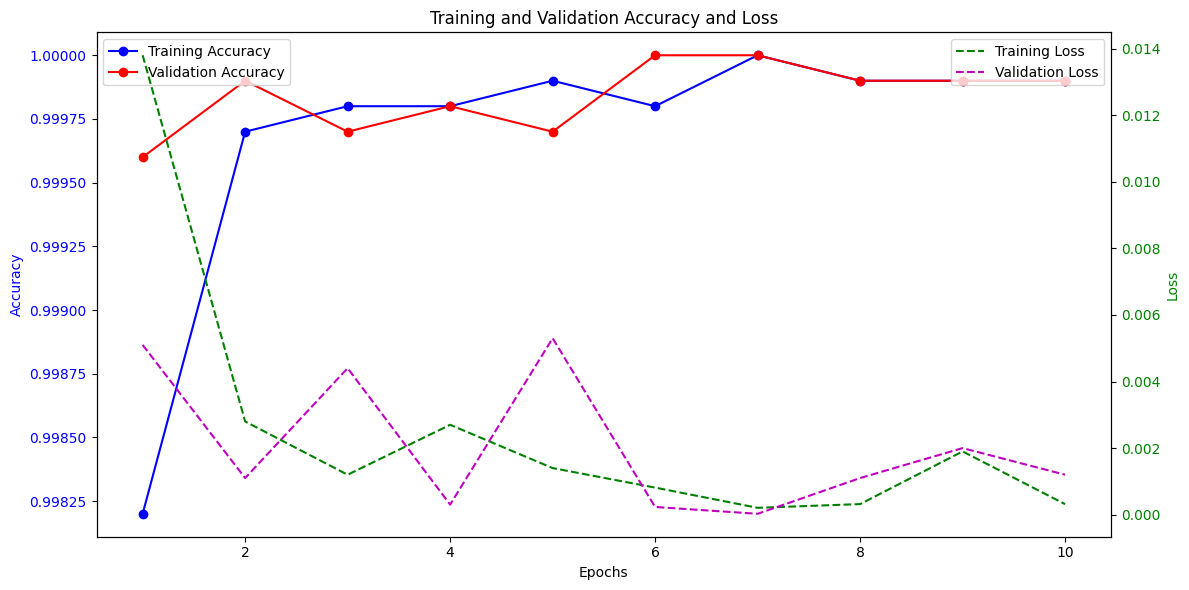

In [15]:
import matplotlib.pyplot as plt

# Provided data
epochs = range(1, 11)
accuracy = [0.9982, 0.9997, 0.9998, 0.9998, 0.9999, 0.9998, 1.0000, 0.9999, 0.9999, 0.9999]
loss = [0.0138, 0.0028, 0.0012, 0.0027, 0.0014, 8.1353e-04, 2.0639e-04, 3.1814e-04, 0.0019, 3.1628e-04]
val_accuracy = [0.9996, 0.9999, 0.9997, 0.9998, 0.9997, 1.0000, 1.0000, 0.9999, 0.9999, 0.9999]
val_loss = [0.0051, 0.0011, 0.0044, 3.0284e-04, 0.0053, 2.3165e-04, 2.6567e-05, 0.0011, 0.0020, 0.0012]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot training & validation accuracy values
ax1.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
ax1.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create a second y-axis to plot loss values
ax2 = ax1.twinx()
ax2.plot(epochs, loss, 'g--', label='Training Loss')
ax2.plot(epochs, val_loss, 'm--', label='Validation Loss')
ax2.set_ylabel('Loss', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

plt.title('Training and Validation Accuracy and Loss')
plt.tight_layout()
plt.show()

# **Train MLPs**

In [16]:
# Preprocessing pipeline for numerical and categorical features
numerical_features = train_df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = train_df.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the train and test data
train_df_processed = preprocessor.fit_transform(train_df).toarray()
test_df_processed = preprocessor.transform(test_df).toarray()

# Combine train and test labels to fit the label encoder
all_labels = pd.concat([train_labels, test_labels], axis=0)

# Encode the labels as integers
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)
train_labels_encoded_int = label_encoder.transform(train_labels)
test_labels_encoded_int = label_encoder.transform(test_labels)

# Convert labels to categorical format
train_labels_encoded = to_categorical(train_labels_encoded_int)
test_labels_encoded = to_categorical(test_labels_encoded_int)

# Build the MLP model
model4 = Sequential()
model4.add(Dense(128, activation='relu', input_shape=(train_df_processed.shape[1],)))
model4.add(Dropout(0.2))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(train_labels_encoded.shape[1], activation='softmax'))

# Compile the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model4.fit(train_df_processed, train_labels_encoded, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Make predictions
test_predictions4 = model4.predict(test_df_processed)
test_predictions4_labels = np.argmax(test_predictions4, axis=1)

# Decode the integer predictions back to original labels
test_predictions4_labels_decoded = label_encoder.inverse_transform(test_predictions4_labels)

# Evaluate performance
print("Classification Report:")
print(classification_report(test_labels, test_predictions4_labels_decoded))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3150/3150 - 8s - 3ms/step - accuracy: 0.9944 - loss: 0.0245 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 2/10
3150/3150 - 6s - 2ms/step - accuracy: 0.9996 - loss: 0.0035 - val_accuracy: 0.9999 - val_loss: 0.0016
Epoch 3/10
3150/3150 - 6s - 2ms/step - accuracy: 0.9998 - loss: 0.0025 - val_accuracy: 0.9999 - val_loss: 8.0257e-04
Epoch 4/10
3150/3150 - 7s - 2ms/step - accuracy: 0.9999 - loss: 9.2718e-04 - val_accuracy: 0.9999 - val_loss: 0.0024
Epoch 5/10
3150/3150 - 7s - 2ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.9997 - val_loss: 0.0036
Epoch 6/10
3150/3150 - 9s - 3ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9999 - val_loss: 0.0020
Epoch 7/10
3150/3150 - 11s - 4ms/step - accuracy: 0.9998 - loss: 8.9082e-04 - val_accuracy: 0.9999 - val_loss: 4.1068e-04
Epoch 8/10
3150/3150 - 10s - 3ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 1.5427e-04
Epoch 9/10
3150/3150 - 9s - 3ms/step - accuracy: 0.9999 - loss: 9.3652e-04

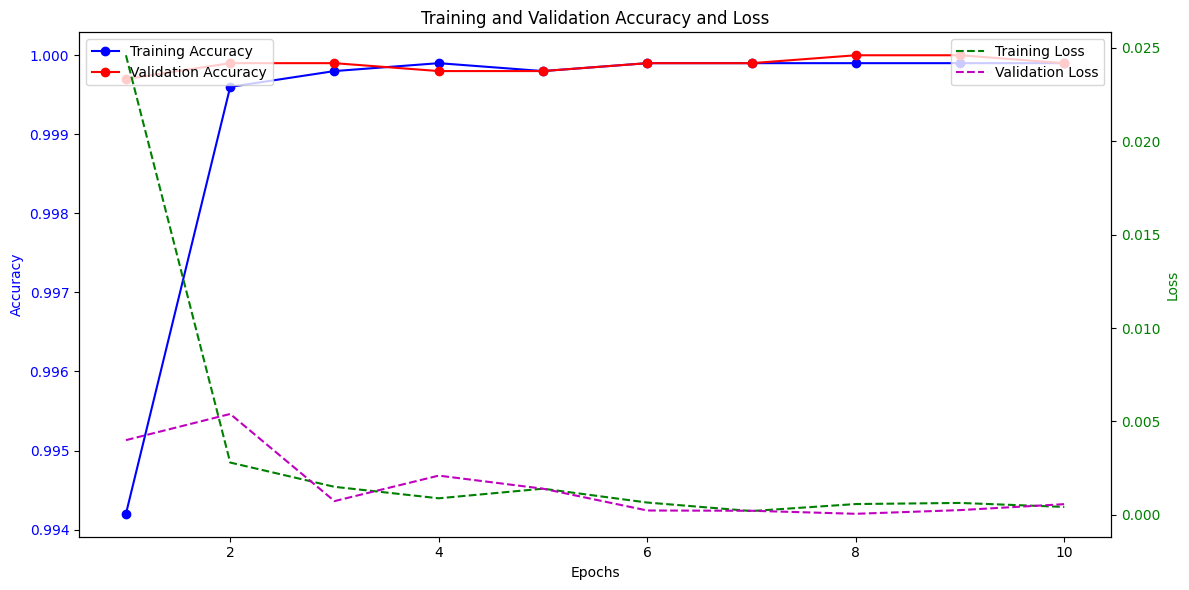

In [17]:
import matplotlib.pyplot as plt

# Provided data
epochs = range(1, 11)
accuracy = [0.9942, 0.9996, 0.9998, 0.9999, 0.9998, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999]
loss = [0.0246, 0.0028, 0.0015, 8.8668e-04, 0.0014, 6.5886e-04, 2.0334e-04, 5.7826e-04, 6.3759e-04, 4.2454e-04]
val_accuracy = [0.9997, 0.9999, 0.9999, 0.9998, 0.9998, 0.9999, 0.9999, 1.0000, 1.0000, 0.9999]
val_loss = [0.0040, 0.0054, 7.3594e-04, 0.0021, 0.0014, 2.3291e-04, 2.1865e-04, 5.6473e-05, 2.5374e-04, 5.7236e-04]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot training & validation accuracy values
ax1.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
ax1.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create a second y-axis to plot loss values
ax2 = ax1.twinx()
ax2.plot(epochs, loss, 'g--', label='Training Loss')
ax2.plot(epochs, val_loss, 'm--', label='Validation Loss')
ax2.set_ylabel('Loss', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

plt.title('Training and Validation Accuracy and Loss')
plt.tight_layout()
plt.show()

# **Train Antoencoders**

In [18]:
from keras.models import Model
from keras.layers import  Input


# Build the autoencoder model
input_dim = train_df_processed.shape[1]
encoding_dim = 64  # Number of nodes in the encoded layer

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
encoder = Dropout(0.2)(encoder)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(train_df_processed, train_df_processed, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the autoencoder
reconstruction_loss = autoencoder.evaluate(test_df_processed, test_df_processed, verbose=0)
print(f"Reconstruction loss: {reconstruction_loss}")

Epoch 1/50
3150/3150 - 6s - 2ms/step - loss: 0.1994 - val_loss: 0.1757
Epoch 2/50
3150/3150 - 6s - 2ms/step - loss: 0.1894 - val_loss: 0.1745
Epoch 3/50
3150/3150 - 5s - 2ms/step - loss: 0.1884 - val_loss: 0.1739
Epoch 4/50
3150/3150 - 6s - 2ms/step - loss: 0.1879 - val_loss: 0.1735
Epoch 5/50
3150/3150 - 11s - 3ms/step - loss: 0.1874 - val_loss: 0.1732
Epoch 6/50
3150/3150 - 7s - 2ms/step - loss: 0.1872 - val_loss: 0.1730
Epoch 7/50
3150/3150 - 5s - 2ms/step - loss: 0.1870 - val_loss: 0.1728
Epoch 8/50
3150/3150 - 5s - 2ms/step - loss: 0.1868 - val_loss: 0.1728
Epoch 9/50
3150/3150 - 10s - 3ms/step - loss: 0.1868 - val_loss: 0.1728
Epoch 10/50
3150/3150 - 6s - 2ms/step - loss: 0.1867 - val_loss: 0.1727
Epoch 11/50
3150/3150 - 5s - 1ms/step - loss: 0.1867 - val_loss: 0.1726
Epoch 12/50
3150/3150 - 5s - 2ms/step - loss: 0.1866 - val_loss: 0.1726
Epoch 13/50
3150/3150 - 7s - 2ms/step - loss: 0.1866 - val_loss: 0.1727
Epoch 14/50
3150/3150 - 5s - 2ms/step - loss: 0.1866 - val_loss: 0.1727

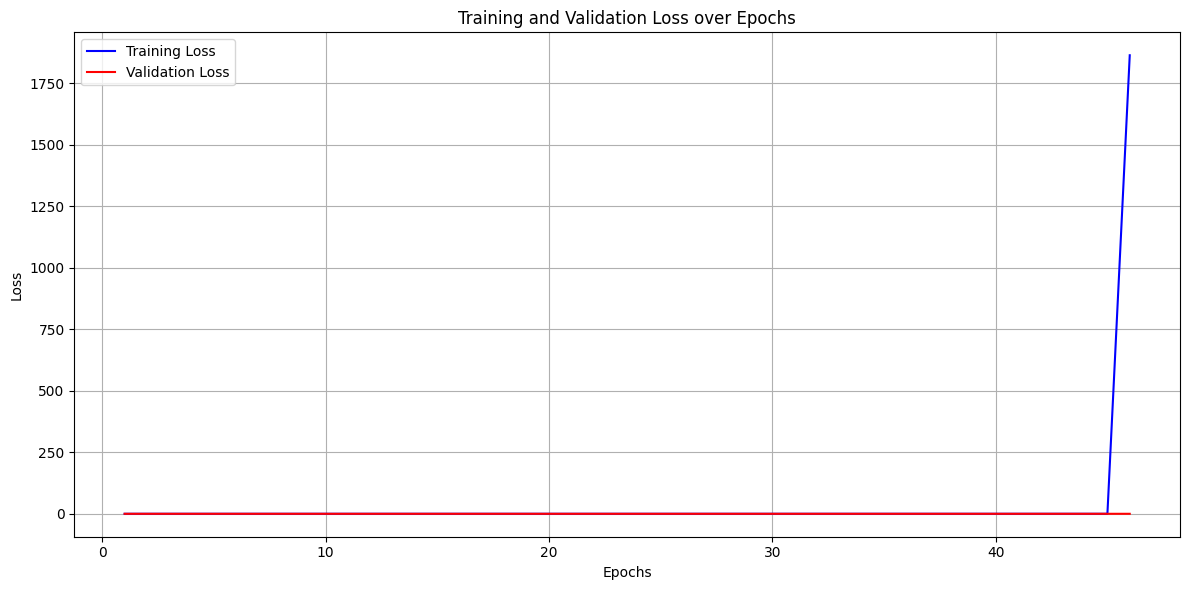

In [19]:
import matplotlib.pyplot as plt

# Provided data with 46 entries
epochs = range(1, 47)  # 46 epochs
loss = [0.1997, 0.1896, 0.1885, 0.1878, 0.1875, 0.1872, 0.1871, 0.1869, 0.1869, 0.1868,
        0.1868, 0.1867, 0.1867, 0.1867, 0.1867, 0.1867, 0.1867, 0.1866, 0.1867, 0.1866,
        0.1865, 0.1865, 0.1865, 0.1865, 0.1865, 0.1865, 0.1865, 0.1865, 0.1865, 0.1865,
        0.1865, 0.1865, 0.1865, 0.1865, 0.1864, 0.1864, 0.1865, 0.1864, 0.1864, 0.1864,
        0.1864, 0.1864, 0.1865, 0.1864, 0.1864, 1864]
val_loss = [0.1758, 0.1744, 0.1738, 0.1734, 0.1731, 0.1730, 0.1729, 0.1728, 0.1728, 0.1728,
            0.1728, 0.1728, 0.1727, 0.1728, 0.1728, 0.1728, 0.1728, 0.1727, 0.1727, 0.1728,
            0.1728, 0.1728, 0.1727, 0.1728, 0.1727, 0.1727, 0.1727, 0.1727, 0.1727, 0.1727,
            0.1728, 0.1728, 0.1727, 0.1727, 0.1727, 0.1727, 0.1727, 0.1727, 0.1727, 0.1727,
            0.1727, 0.1727, 0.1727, 0.1727, 0.1727, 0.1727]

# Create the plot
plt.figure(figsize=(12, 6))

plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## **Use SVM To Print Auto Encoder Classification report**

In [20]:
from sklearn.svm import SVC

# Extract the encoder part to get the encoded features
encoder_model5 = Model(inputs=input_layer, outputs=encoder)
train_encoded5 = encoder_model5.predict(train_df_processed)
test_encoded5 = encoder_model5.predict(test_df_processed)

# Train an SVM model on the encoded features
svm_model = SVC(kernel='linear')
svm_model.fit(train_encoded5, train_labels_encoded_int)

# Make predictions
test_predictions5 = svm_model.predict(test_encoded5)

# Decode the integer predictions back to original labels
test_predictions5_labels_decoded = label_encoder.inverse_transform(test_predictions5)

# Evaluate performance
print("Classification Report:")
print(classification_report(test_labels, test_predictions5_labels_decoded))

3937/3937 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Report:
              precision    recall  f1-score   support

     ipsweep       1.00      1.00      1.00       141
     neptune       0.92      1.00      0.96      4656
      normal       0.88      0.99      0.93      9711
      others       0.98      0.76      0.86      7370
       smurf       1.00      1.00      1.00       665

    accuracy                           0.92     22543
   macro avg       0.96      0.95      0.95     22543
weighted avg       0.92      0.92      0.91     22543



In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
